<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6611178

### Student Name: Yanming Feng (Danny)
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [88]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
import statistics as stats
import calendar
import random

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [16]:
# YOUR CODE HERE
col_names=['Index','Date','Season','Year','Month','Holiday','Weekday','Working Day', 'Weather','Temperature',
          'Feeling Temperature', 'Humidity', 'Windspeed', 'Casual User', 'Registered User', 'Rented Bikes']
df_bikes = pd.read_csv('bike-share.csv', names=col_names,index_col=0,header=0)
df_bikes = df_bikes.drop('Holiday', 1)
df_bikes.head()


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

,Date,Season,Year,Month,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Windspeed,Casual User,Registered User,Rented Bikes
Index,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<span style="color:blue">
    
### YOUR ANSWER HERE
I changed the column title name so that readers can easily understand. I also make the first column 'instant' as pandas' index. I don't think there is a need to split any column. Maybe I can combine Feeling Temperature with Temerature. But there will be a information lost. So I won't do that.

I think Holiday and Working Day can be combined and simplified. Because holiday already means that it's not working day. What's more, there are only 21 data that holiday is 1. The sample is too small for study. So it can be combined.
</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

         Rented Bikes
Weekday              
0                 105
1                 105
2                 104
3                 104
4                 104
5                 104
6                 105
You can see, Rented Bikes count is not equal, some are 105, some are 104, need to randomly drop 1 data from 105
         Rented Bikes
Weekday              
0                 104
1                 104
2                 104
3                 104
4                 104
5                 104
6                 104
Yeah. The data count are now all the same! Let's see how many bike rents in total for each day
         Rented Bikes
Weekday              
5              487790
4              485395
3              473048
6              469955
2              469109
1              448445
0              441132


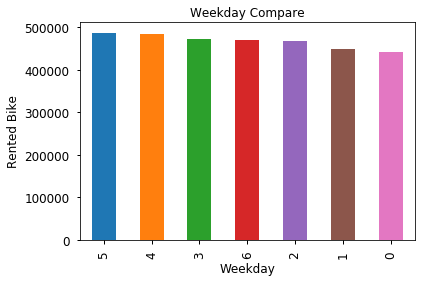

Most popluar Weekday: 5 which is Friday
Least popluar Weekday: 0 which is Sunday


In [181]:
# YOUR CODE HERE
df_bikes_copy = df_bikes.copy()  # Do the modification in a copied dataframe
df_weekday = df_bikes_copy.groupby(['Weekday']).agg({'Rented Bikes': 'count'})
# Check how many data are there in each weekday. Need to make it equal. Otherwise it will bring errors
print(df_weekday)
print("You can see, Rented Bikes count is not equal, some are 105, some are 104, need to randomly drop 1 data from 105")
df_bikes_copy = df_bikes_copy.drop(df_bikes_copy.query('Weekday == 0').sample(1).index)
df_bikes_copy = df_bikes_copy.drop(df_bikes_copy.query('Weekday == 1').sample(1).index)
df_bikes_copy = df_bikes_copy.drop(df_bikes_copy.query('Weekday == 6').sample(1).index)

df_weekday = df_bikes_copy.groupby(['Weekday']).agg({'Rented Bikes': 'count'})
print(df_weekday)
print("Yeah. The data count are now all the same! Let's see how many bike rents in total for each day")

df_weekday = df_bikes_copy.groupby(['Weekday']).agg({'Rented Bikes': 'sum'})
df_weekday = df_weekday.sort_values(['Rented Bikes'], ascending=False)
print(df_weekday)
ax = df_weekday['Rented Bikes'].plot(kind='bar', title="Weekday Compare", fontsize=12)
ax.set_xlabel("Weekday", fontsize=12)
ax.set_ylabel("Rented Bike", fontsize=12)
plt.show()
weekday_mode = df_weekday.index[0]
weekday_min = df_weekday.index[len(df_weekday) - 1]
# In calendar.day_name list, the day starts from Monday, so index should minus 1
print("Most popluar Weekday:", weekday_mode, "which is", calendar.day_name[weekday_mode - 1])
print("Least popluar Weekday:", weekday_min, "which is", calendar.day_name[weekday_min - 1])
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)


The season that has most users: 3 which is Summer
Most popluar month: 1
Most popluar Weekday: 0 which is Sunday


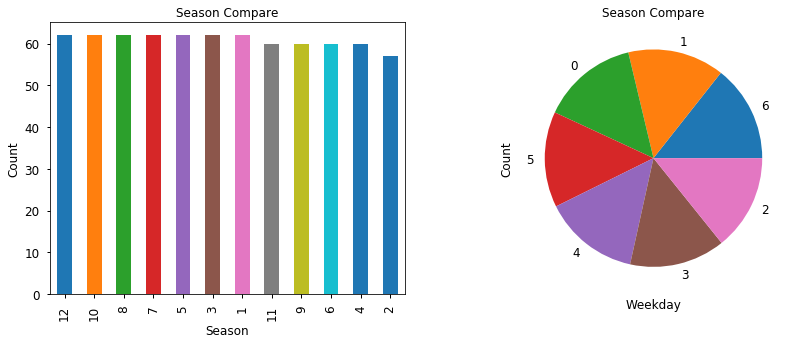

In [178]:
# YOUR CODE HERE
def convert_seasons(x):
    if x == 1:
        return "Winter"
    if x == 2:
        return "Spring"
    if x == 3:
        return "Summer"
    if x == 4:
        return "Autumn"



# df_bikes.describe()
season_mode = df_bikes['Season'].mode().iloc[0]
weekday_mode = df_bikes['Weekday'].mode().iloc[0]
print("The season that has most users:",season_mode, "which is", convert_seasons(season_mode))
print("Most popluar month:", df_bikes["Month"].mode().iloc[0])
# In calendar.day_name list, the day starts from Monday, so index should minus 1
print("Most popluar Weekday:", weekday_mode, "which is", calendar.day_name[weekday_mode-1])

# plt.bar(range(len(df_bikes['Season'])), list(df_bikes['Season'][]), align='center')
# plt.pyplot.xticks(range(len(webPreferences)), list(webPreferences.keys()))

fig = plt.figure(figsize=(14,11))
ax1 = fig.add_subplot(221)
ax1 = df_bikes['Month'].value_counts().plot(kind='bar', title ="Season Compare", fontsize=12)
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax = fig.add_subplot(222)
ax2 = df_bikes['Weekday'].value_counts().plot(kind='pie', title ="Season Compare", fontsize=12)
ax2.set_xlabel("Weekday", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
plt.show()

# print("Mean (Statistics module): ", df_bikes.mean(sample_Data))
# mean_rating = tmp.groupby('title').mean()
# mean_rating.sort_values('rating', ascending=False).head()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

In [5]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

In [6]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

In [7]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

In [8]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

In [9]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [10]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>